In [2]:
from torch.utils.data import Dataset
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
import matplotlib.patches as patches

import cv2
import json
import numpy as np

In [3]:
def getUprightRectangle(points):
    minX = 513
    minY = 513
    maxX = -1
    maxY = -1
    for point in points:
        if point[0] > maxX:
            maxX = point[0]
        if point[0] < minX:
            minX = point[0]
        if point[1] > maxY:
            maxY = point[1]
        if point[1] < minY:
            minY = point[1]
    return((minX,minY),(minX,maxY),(maxX,maxY),(maxX,minY))

def getMaxAndMin(points):
    minX = 513
    minY = 513
    maxX = -1
    maxY = -1
    for point in points:
        if point[0] > maxX:
            maxX = point[0]
        if point[0] < minX:
            minX = point[0]
        if point[1] > maxY:
            maxY = point[1]
        if point[1] < minY:
            minY = point[1]
    return((minX,minY,maxX,maxY))

def displayImageWithRectangle(image,rectangle):
    _, ax = plt.subplots()
    rect = patches.Rectangle((rectangle[0],rectangle[1]), rectangle[2]-rectangle[0],rectangle[3]-rectangle[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.imshow(image)
    ax.add_patch(rect) 

In [4]:
class boundingRectangleDataset(Dataset):
	def __init__(self, imagePath, JSONPath, transforms=None):
		# store the image and mask filepaths, and augmentation
		# transforms
		self.imagePath = imagePath
		self.imageFiles = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]
		fJSON = open(JSONPath)
		self.maskJSON = json.load(fJSON)
		self.transforms = transforms
	def __len__(self):
		# return the number of total samples contained in the dataset
		return len(self.imageFiles)
	def __getitem__(self, idx):
		# grab the image path from the current index
		imagePath = join(self.imagePath,self.imageFiles[idx])
		# Return RGB of image
		image = cv2.imread(imagePath)
		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		#Creating the rectangle
		points = []
		for point in self.maskJSON[self.imageFiles[idx]]['bounds_x_y']:
			points.append((point['x'],point['y']))
		return (image, getMaxAndMin(points))

(218.06963789359622, 218.36260387425096, 293.9303621064038, 265.63738715681046)


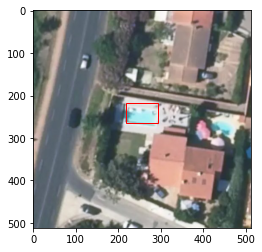

In [9]:
data = boundingRectangleDataset('Images/train','metadata.json')
image,rectangle = data[45]
print(rectangle)
displayImageWithRectangle(image,rectangle)
